In [1]:
# Import imbalanced_ensemble
import imbalanced_ensemble as imbens

# # Import utilities
# from collections import Counter
# import sklearn
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from imbalanced_ensemble.ensemble.base import sort_dict_by_key

# Import plot utilities
import matplotlib.pyplot as plt
from imbalanced_ensemble.utils._plot import plot_2Dprojection_and_cardinality
import seaborn as sns

# Numerical Utils
import pandas as pd
import numpy as np



## Load featureset

In [4]:
feats_csv_path = "AC75a-5 DOB 072519_TS_2020-03-23_17_30_04.csv"
df = pd.read_csv(feats_csv_path,index_col=0)
df.head()

,session_basename,time_bin,mean_power_chraw_000_chfreq_001,mean_power_chraw_000_chfreq_003,mean_power_chraw_000_chfreq_005,mean_power_chraw_000_chfreq_007,mean_power_chraw_000_chfreq_009,mean_power_chraw_000_chfreq_011,mean_power_chraw_000_chfreq_013,mean_power_chraw_000_chfreq_015,...,coherence_freq_500.0_chx_001_chy_003,coherence_freq_1000.0_chx_001_chy_003,coherence_freq_0.0_chx_002_chy_003,coherence_freq_15.62_chx_002_chy_003,coherence_freq_31.25_chx_002_chy_003,coherence_freq_62.5_chx_002_chy_003,coherence_freq_125.0_chx_002_chy_003,coherence_freq_250.0_chx_002_chy_003,coherence_freq_500.0_chx_002_chy_003,coherence_freq_1000.0_chx_002_chy_003
0,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,56.7156,144.1807,-7.8824,7.6939,24.4479,1.4429,1.4656,-4.8560,...,0.018004,3.650702e-02,0.238529,0.491751,0.472625,0.143596,0.000278,0.029355,0.002549,0.007221
1,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,-53.9221,-7.3805,-13.5823,20.5395,-16.4621,-2.7195,-2.8214,2.0746,...,0.012172,7.533822e-04,0.010505,0.427188,0.386341,0.040605,0.019880,0.005875,0.004259,0.000952
2,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,4.8714,-6.8261,-5.0513,36.6682,-1.0790,-7.5667,2.0832,13.6164,...,0.010886,2.948796e-03,0.663858,0.857009,0.820433,0.205777,0.003827,0.018094,0.009289,0.000653
3,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,-21.5319,-30.1663,-17.5068,3.2853,-39.3127,-10.5423,7.5530,-10.8521,...,0.013975,9.473201e-07,0.906969,0.954968,0.940081,0.486140,0.026860,0.004638,0.009801,0.017705
4,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,9.2739,-9.3193,1.0454,-7.7290,-29.2110,7.3796,-2.2477,-38.6640,...,0.003615,5.160409e-03,0.083028,0.208803,0.111817,0.018398,0.002199,0.043590,0.011841,0.004030


## Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Select features
X = df.drop(["session_basename","time_bin"],axis=1)
# Standardize the features
X = StandardScaler().fit_transform(X)
# Select classes
y = list(df["time_bin"])

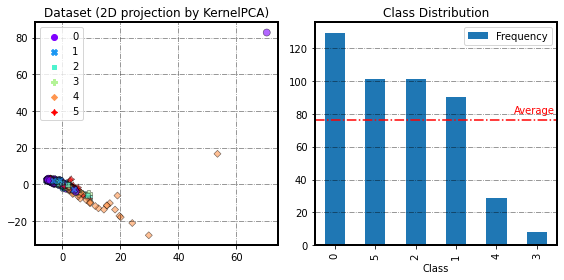

In [14]:
class_dic = {"pre1":0,"pre2":1,"pre3":2,"pre4":3,"intra":4,"post":5}
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y,
                                                      test_size=0.4,
                                                      stratify=y,
                                                      random_state=RANDOM_STATE)
# Visualize the training dataset
fig = plot_2Dprojection_and_cardinality(X_train, [class_dic[i] for i in y_train], figsize=(8, 4))
plt.show()


## Train

Links: [medium guid](https://medium.com/urbint-engineering/using-smoteboost-and-rusboost-to-deal-with-class-imbalance-c18f8bf5b805), [RUSboost paper](https://sci2s.ugr.es/keel/pdf/algorithm/articulo/2010-IEEE%20TSMCpartA-RUSBoost%20A%20Hybrid%20Approach%20to%20Alleviating%20Class%20Imbalance.pdf), [SMOTE paper](https://www-users.cse.umn.edu/~lazar027/papers/pkdd03.pdf)

Ensemble methods
1. Just AdaBoost, for baseline
2. SMOTE sampling and then AdaBoost (Synthetic Minority Over-sampling TEchnique)
3. RUS sampling and then AdaBoost (Random Under Sampling)

In [ ]:
RANDOM_STATE = 42

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import smote
from imblearn.under_sampling import RandomUnderSampler as RUS

In [67]:
def adaboost(X_train, X_test, y_train):
    model = AdaBoostClassifier(n_estimators=100, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# AdaBoost
y_baseline = adaboost(X_train, X_valid, y_train)

# SMOTE
sm = SMOTE(random_state=RANDOM_STATE)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_smote = adaboost(X_train_sm, X_valid, y_train_sm)

# RUS
rus = RUS(random_state=RANDOM_STATE)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_rus = adaboost(X_train_rus, X_valid, y_train_rus)

## Evaluate models

In [68]:
from sklearn.metrics import classification_report

In [69]:
# AdaBoost
print(classification_report(y_valid, y_baseline))

              precision    recall  f1-score   support

       intra       0.92      0.63      0.75        19
        post       0.60      0.88      0.72        67
        pre1       0.43      0.97      0.60        87
        pre2       0.00      0.00      0.00        60
        pre3       0.00      0.00      0.00        67
        pre4       0.00      0.00      0.00         6

    accuracy                           0.51       306
   macro avg       0.33      0.41      0.34       306
weighted avg       0.31      0.51      0.37       306



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [70]:
# SMOTE
print(classification_report(y_valid, y_smote))

              precision    recall  f1-score   support

       intra       0.92      0.63      0.75        19
        post       0.22      0.96      0.36        67
        pre1       0.00      0.00      0.00        87
        pre2       0.00      0.00      0.00        60
        pre3       0.00      0.00      0.00        67
        pre4       0.00      0.00      0.00         6

    accuracy                           0.25       306
   macro avg       0.19      0.26      0.19       306
weighted avg       0.11      0.25      0.13       306



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [71]:
# SMOTE
print(classification_report(y_valid, y_rus))

              precision    recall  f1-score   support

       intra       1.00      0.58      0.73        19
        post       0.22      0.12      0.15        67
        pre1       0.28      0.71      0.41        87
        pre2       0.33      0.02      0.03        60
        pre3       0.00      0.00      0.00        67
        pre4       0.00      0.00      0.00         6

    accuracy                           0.27       306
   macro avg       0.31      0.24      0.22       306
weighted avg       0.26      0.27      0.20       306

